# Deep Learning For Portfolio Selection 

Most portfolio optimization techniques require in one way or another, forcasting the returns of the selection universe.
In this work, we're going to optimize directly the sharpe ration of our portfolio.

*In the first session we're going to optimize the sharpe ratio with scipy 
*In the second part we are going to adopt deep learning model to directly optimize a portfolio's Sharpe ratio.

His framework circumvents the requirements for forecasting expected returns and allows the model to directly optimize portfolio weights.

We decide to construct two portfolio. The first one is base on individual asset like AAPL, MSFT.... 
The second one is base on Cryptocurrencie.

For our work, we're going to consider the first day of 2010 to the last days of 2022 as the testing period to the first portfolio, and the first day of 2021 to the last days of 2022 as the testing period to the second porfolio 

##### Model Architecture

We have tested deep learning models including fully connected neural network (FCN),convolutional neural network CNN, Flatten) and long short-term memory (LSTM, with 100 units).

Insead to maximize the shape ration function, we're going to minimize the negative function associate to the SR.



### Import lib 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import plotly.express as px
from scipy.optimize import minimize

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Flatten, Dense
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K

## Creation of our Portfolio

### Create a crypto's Portfolio

In [35]:
start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2022-01-01')

start2 = pd.to_datetime('2021-01-01')
end2 = pd.to_datetime('2022-11-09')

In [40]:
asset= ["MSFT", "AMZN", "KO", "MA", "COST", 
           "LUV", "XOM", "PFE", "JPM", "UNH", 
           "ACN", "DIS", "GILD", "F", "TSLA"]
crypos=['BTC-USD','ETH-USD','BNB-USD','XRP-USD','AVAX-USD','SOL-USD','ADA-USD','MATIC-USD','LINK-USD', 'DOT-USD']

In [41]:
assets=pdr.DataReader(asset,'yahoo',start,end)
crypto=pdr.DataReader(crypos,'yahoo',start2,end2)

In [42]:
assets=assets['Close']
crypto=crypto['Close']

###  Portfolio's Dataset

In [43]:
display(assets,crypto)

Symbols,MSFT,AMZN,KO,MA,COST,LUV,XOM,PFE,JPM,UNH,ACN,DIS,GILD,F,TSLA
Date,,,,,,,,,,,,,,,
2015-01-02,46.759998,15.426000,42.139999,85.680000,141.610001,42.689999,92.830002,29.724857,62.490002,100.779999,88.839996,93.750000,94.910004,15.360000,14.620667
2015-01-05,46.330002,15.109500,42.139999,83.269997,140.000000,41.639999,90.290001,29.563566,60.549999,99.120003,87.339996,92.379997,96.790001,14.760000,14.006000
2015-01-06,45.650002,14.764500,42.459999,83.089996,141.850006,40.459999,89.809998,29.810247,58.980000,98.919998,86.709999,91.889999,97.650002,14.620000,14.085333
2015-01-07,46.230000,14.921000,42.990002,84.220001,144.320007,40.799999,90.720001,30.218216,59.070000,99.930000,88.529999,92.830002,99.480003,15.040000,14.063333
2015-01-08,47.590000,15.023000,43.509998,85.529999,145.559998,41.880001,92.230003,30.834915,60.389999,104.699997,89.879997,93.790001,102.300003,15.420000,14.041333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,342.450012,169.669495,58.650002,360.309998,563.469971,41.759998,61.889999,59.200001,158.160004,499.500000,415.329987,152.800003,72.870003,20.799999,364.646667
2021-12-28,341.250000,170.660995,58.880001,360.779999,564.640015,42.290001,61.689999,58.009998,158.639999,502.940002,415.269989,155.199997,72.970001,20.760000,362.823334
2021-12-29,341.950012,169.201004,58.950001,361.290009,567.770020,42.160000,61.150002,57.580002,158.559998,505.579987,415.420013,154.869995,73.639999,20.559999,362.063324


Symbols,BTC-USD,ETH-USD,BNB-USD,XRP-USD,AVAX-USD,SOL-USD,ADA-USD,MATIC-USD,LINK-USD,DOT-USD
Date,,,,,,,,,,
2021-01-01,29374.152344,730.367554,37.905010,0.237444,3.664823,1.842084,0.175350,0.017812,11.872555,8.306819
2021-01-02,32127.267578,774.534973,38.241592,0.221655,3.494940,1.799275,0.177423,0.019043,12.220137,9.208837
2021-01-03,32782.023438,975.507690,41.148979,0.225848,3.472944,2.161752,0.204995,0.019975,13.650172,10.033283
2021-01-04,31971.914062,1040.233032,40.926353,0.236677,3.590243,2.485097,0.224762,0.024614,13.571063,9.469611
2021-01-05,33992.429688,1100.006104,41.734600,0.226750,4.237412,2.157217,0.258314,0.024467,14.539868,9.701656
...,...,...,...,...,...,...,...,...,...,...
2022-11-06,20926.486328,1572.234741,339.389374,0.470670,18.279230,32.683582,0.403005,1.137968,8.121049,6.820865
2022-11-07,20602.816406,1568.591309,337.014557,0.465857,18.068420,29.601345,0.404259,1.252449,8.895981,7.121714
2022-11-08,18541.271484,1332.835571,327.690277,0.406242,15.991605,24.152937,0.371834,1.044419,7.683034,6.294656


In [44]:
log_ret_crypto = np.log(crypto/crypto.shift(1))
log_ret_assets = np.log(assets/assets.shift(1))
display(log_ret_crypto,log_ret_assets)

Symbols,BTC-USD,ETH-USD,BNB-USD,XRP-USD,AVAX-USD,SOL-USD,ADA-USD,MATIC-USD,LINK-USD,DOT-USD
Date,,,,,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,0.089590,0.058715,0.008840,-0.068810,-0.047464,-0.023514,0.011753,0.066827,0.028856,0.103087
2021-01-03,0.020175,0.230695,0.073275,0.018740,-0.006314,0.183535,0.144449,0.047782,0.110667,0.085744
2021-01-04,-0.025022,0.064242,-0.005425,0.046834,0.033217,0.139393,0.092056,0.208834,-0.005812,-0.057820
2021-01-05,0.061280,0.055871,0.019556,-0.042848,0.165733,-0.141493,0.139134,-0.005990,0.068955,0.024209
...,...,...,...,...,...,...,...,...,...,...
2022-11-06,-0.016878,-0.034835,-0.028651,-0.047021,-0.069930,-0.117694,-0.057214,-0.039420,-0.064888,-0.028699
2022-11-07,-0.015588,-0.002320,-0.007022,-0.010279,-0.011600,-0.099053,0.003107,0.095857,0.091140,0.043162
2022-11-08,-0.105429,-0.162869,-0.028057,-0.136930,-0.122102,-0.203414,-0.083608,-0.181640,-0.146585,-0.123447


Symbols,MSFT,AMZN,KO,MA,COST,LUV,XOM,PFE,JPM,UNH,ACN,DIS,GILD,F,TSLA
Date,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.009238,-0.020731,0.000000,-0.028531,-0.011434,-0.024903,-0.027743,-0.005441,-0.031537,-0.016609,-0.017028,-0.014721,0.019615,-0.039846,-0.042950
2015-01-06,-0.014786,-0.023098,0.007565,-0.002164,0.013128,-0.028747,-0.005330,0.008309,-0.026271,-0.002020,-0.007239,-0.005318,0.008846,-0.009530,0.005648
2015-01-07,0.012625,0.010544,0.012405,0.013508,0.017263,0.008368,0.010082,0.013593,0.001525,0.010159,0.020772,0.010178,0.018567,0.028323,-0.001563
2015-01-08,0.028994,0.006813,0.012023,0.015435,0.008555,0.026126,0.016508,0.020203,0.022100,0.046629,0.015134,0.010288,0.027953,0.024952,-0.001566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.022921,-0.008212,0.007359,-0.000749,0.023523,-0.002631,0.014157,0.008312,0.005707,0.008282,0.029368,-0.005417,0.005366,0.026798,0.024935
2021-12-28,-0.003510,0.005827,0.003914,0.001304,0.002074,0.012612,-0.003237,-0.020306,0.003030,0.006863,-0.000144,0.015585,0.001371,-0.001925,-0.005013
2021-12-29,0.002049,-0.008592,0.001188,0.001413,0.005528,-0.003079,-0.008792,-0.007440,-0.000504,0.005235,0.000361,-0.002129,0.009140,-0.009681,-0.002097


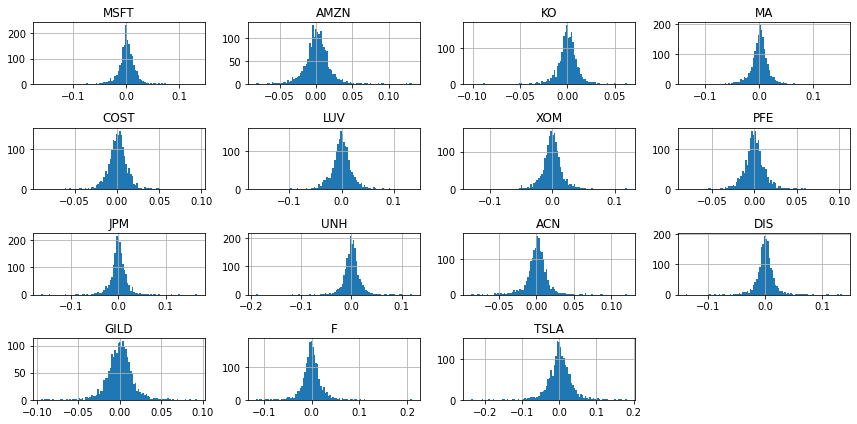

In [45]:
%matplotlib inline
log_ret_assets.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [46]:
fig = px.line(assets, template='plotly_white')
fig.show()

# Mathematical Optimization

In this part we're going to optimize our shape ration!

### Functionalize Return and SR operations

In [47]:
# function for asset change the log_ret_assets to log _ret_crypto
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    
    weights = np.array(weights)
    ret = np.sum(log_ret_assets.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret_assets.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

To fully understand all the parameters, check out:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [48]:
#help(minimize)

Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

In [49]:
# function for asset 
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1


In [50]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [51]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [52]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), 
          (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), 
          (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [53]:
# Initial Guess (equal distribution)
c=1/15
init_guess = [c,c,c,c,c,c,c,c,c,c,c,c,c,c,c]

In [54]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [55]:
opt_results

     fun: -1.3663043381182007
     jac: array([ 7.71570206e-03,  1.50561333e-04,  3.22652146e-01,  2.07191557e-01,
        4.46885824e-05,  7.98100412e-01,  1.03573781e+00,  1.23290733e-01,
        2.67117277e-01, -2.99543142e-04, -3.49834561e-04,  4.70132113e-01,
        8.84749547e-01,  6.39522031e-01,  1.84088945e-04])
 message: 'Optimization terminated successfully'
    nfev: 144
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.28716319e-16, 3.33339726e-01, 0.00000000e+00, 0.00000000e+00,
       3.05841572e-01, 1.77454844e-16, 8.13650295e-16, 0.00000000e+00,
       0.00000000e+00, 1.61727400e-01, 9.74639859e-02, 2.29600105e-17,
       4.99228459e-16, 3.46062949e-17, 1.01627316e-01])

In [56]:
opt_results.x

array([1.28716319e-16, 3.33339726e-01, 0.00000000e+00, 0.00000000e+00,
       3.05841572e-01, 1.77454844e-16, 8.13650295e-16, 0.00000000e+00,
       0.00000000e+00, 1.61727400e-01, 9.74639859e-02, 2.29600105e-17,
       4.99228459e-16, 3.46062949e-17, 1.01627316e-01])

In [57]:
display(opt_results.x,
        '------Sum of allo------ :',opt_results.x.sum(),
        '------return , volatility , Shape ratio------ :',get_ret_vol_sr(opt_results.x))

array([1.28716319e-16, 3.33339726e-01, 0.00000000e+00, 0.00000000e+00,
       3.05841572e-01, 1.77454844e-16, 8.13650295e-16, 0.00000000e+00,
       0.00000000e+00, 1.61727400e-01, 9.74639859e-02, 2.29600105e-17,
       4.99228459e-16, 3.46062949e-17, 1.01627316e-01])

'------Sum of allo------ :'

1.0000000000000007

'------return , volatility , Shape ratio------ :'

array([0.27907651, 0.20425648, 1.36630434])

In [58]:
d={'weight_MKV':list(opt_results.x)}

In [59]:
wei=pd.DataFrame(data=d,index=list(assets.columns))
wei

,weight_MKV
MSFT,1.287163e-16
AMZN,3.333397e-01
KO,0.000000e+00
MA,0.000000e+00
COST,3.058416e-01
LUV,1.774548e-16
XOM,8.136503e-16
PFE,0.000000e+00
JPM,0.000000e+00
UNH,1.617274e-01


C:\Users\JeanPhilippeNdri\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1666: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 



array([<AxesSubplot:ylabel='weight_MKV'>], dtype=object)

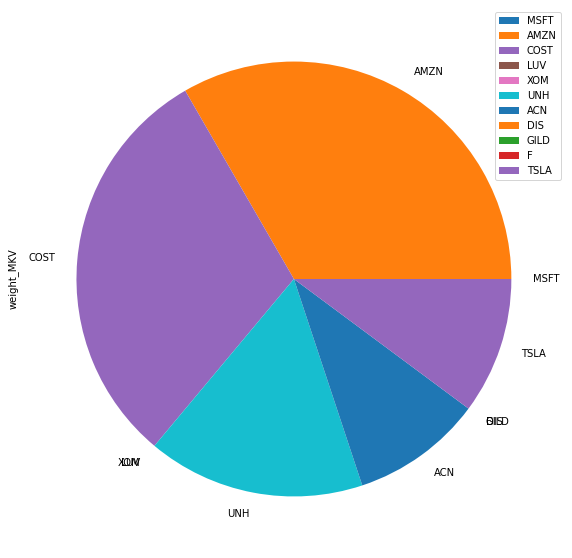

In [60]:
wei.plot.pie(figsize=(10, 10),subplots=True)

## Pyfolio

In [61]:
import pypfopt

In [62]:
from pypfopt import risk_models
from pypfopt import plotting
from pypfopt import expected_returns

sample_cov = risk_models.sample_cov(assets, frequency=252)
sample_cov

Symbols,MSFT,AMZN,KO,MA,COST,LUV,XOM,PFE,JPM,UNH,ACN,DIS,GILD,F,TSLA
Symbols,,,,,,,,,,,,,,,
MSFT,0.072772,0.052509,0.022348,0.050705,0.028540,0.031034,0.028329,0.023742,0.037025,0.037269,0.042697,0.032142,0.025735,0.030679,0.058271
AMZN,0.052509,0.090622,0.012942,0.041104,0.024469,0.021888,0.019035,0.016135,0.023273,0.027795,0.031877,0.024036,0.021304,0.020132,0.058192
KO,0.022348,0.012942,0.035071,0.027164,0.015776,0.025841,0.024711,0.017248,0.026355,0.021449,0.023796,0.023119,0.014790,0.024931,0.019318
MA,0.050705,0.041104,0.027164,0.079009,0.022908,0.044689,0.041119,0.025000,0.048280,0.038714,0.045491,0.043794,0.022356,0.042864,0.052909
COST,0.028540,0.024469,0.015776,0.022908,0.042628,0.015574,0.014687,0.015518,0.019105,0.021881,0.023232,0.017172,0.017884,0.017448,0.026205
LUV,0.031034,0.021888,0.025841,0.044689,0.015574,0.126758,0.043286,0.021512,0.056466,0.030915,0.034267,0.045611,0.017883,0.053165,0.035135
XOM,0.028329,0.019035,0.024711,0.041119,0.014687,0.043286,0.079264,0.021431,0.051710,0.031064,0.032124,0.038281,0.020483,0.048883,0.032273
PFE,0.023742,0.016135,0.017248,0.025000,0.015518,0.021512,0.021431,0.051912,0.026451,0.027205,0.022164,0.018436,0.026143,0.019990,0.016407
JPM,0.037025,0.023273,0.026355,0.048280,0.019105,0.056466,0.051710,0.026451,0.080409,0.038181,0.040427,0.044684,0.024182,0.056177,0.038588


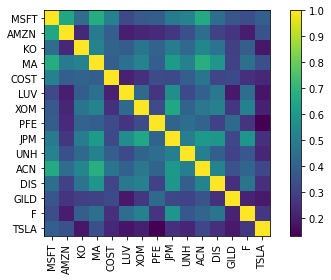

In [63]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

In [64]:
mu = expected_returns.capm_return(assets)
S = risk_models.CovarianceShrinkage(assets).ledoit_wolf()

In [93]:
help(risk_models)

Help on module pypfopt.risk_models in pypfopt:

NAME
    pypfopt.risk_models

DESCRIPTION
    The ``risk_models`` module provides functions for estimating the covariance matrix given
    historical returns.
    
    The format of the data input is the same as that in :ref:`expected-returns`.
    
    **Currently implemented:**
    
    - fix non-positive semidefinite matrices
    - general risk matrix function, allowing you to run any risk model from one function.
    - sample covariance
    - semicovariance
    - exponentially weighted covariance
    - minimum covariance determinant
    - shrunk covariance matrices:
    
        - manual shrinkage
        - Ledoit Wolf shrinkage
        - Oracle Approximating shrinkage
    
    - covariance to correlation matrix

CLASSES
    builtins.object
        CovarianceShrinkage
    
    class CovarianceShrinkage(builtins.object)
     |  CovarianceShrinkage(prices, returns_data=False, frequency=252, log_returns=False)
     |  
     |  Provide me

In [65]:
from pypfopt import EfficientFrontier
from pypfopt import objective_functions

ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamme is the tuning parameter
ef.efficient_risk(target_volatility=0.19128863)
weights = ef.clean_weights()
weights

OrderedDict([('MSFT', 0.07703),
             ('AMZN', 0.0634),
             ('KO', 0.0451),
             ('MA', 0.08034),
             ('COST', 0.04751),
             ('LUV', 0.07316),
             ('XOM', 0.06782),
             ('PFE', 0.05383),
             ('JPM', 0.07832),
             ('UNH', 0.06865),
             ('ACN', 0.06901),
             ('DIS', 0.06607),
             ('GILD', 0.05877),
             ('F', 0.07291),
             ('TSLA', 0.07809)])

In [66]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

0/15 tickers have zero weight


In [67]:
ef.portfolio_performance(verbose=True);

Expected annual return: 19.9%
Annual volatility: 19.1%
Sharpe Ratio: 0.93


<AxesSubplot:ylabel='None'>

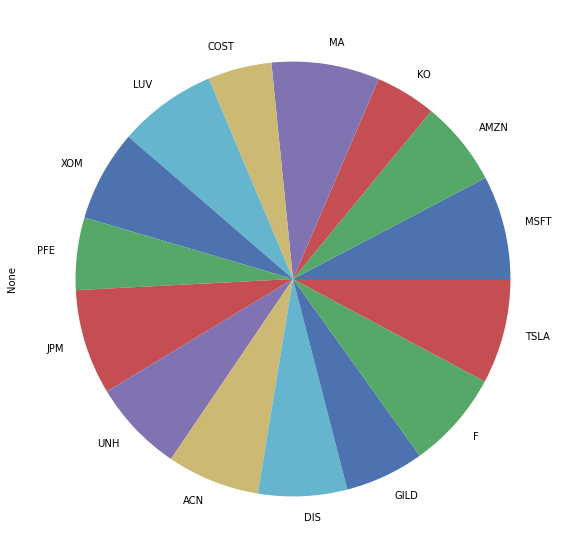

In [68]:
pd.Series(weights).plot.pie(figsize=(10, 10))

# Deep model for Portfolio selection

In [69]:
# setting the seed allows for reproducible results
np.random.seed(101)

In [70]:
#### Test

#x = tf.constant([[1, 2, 3], [5, 5, 5], [1, 1, 1]])
#x.numpy()
#display(tf.reduce_sum(x, axis=0))
#display(tf.reduce_sum(x, axis=1))
#display(tf.reduce_sum(assets, axis=1))
#help(tf.reduce_sum)
#x = tf.constant(([1, 2, 3, 4]))
#tf.multiply(x, x).numpy()

In [170]:
class Model:
    def __init__(self):
        self.data = None
        self.model = None
        
    #-----------------------------------def our Deep Learning Model    
    def __build_model(self, input_shape, outputs):
        
        '''
        Builds and returns the Deep Neural Network that will compute the allocation ratios
        that optimize the Sharpe Ratio of the portfolio
        
        inputs: input_shape - tuple of the input shape, outputs - the number of assets
        returns: a Deep Neural Network model
        '''
        
        
        model = Sequential()
        #model.add(LSTM(64, input_shape=input_shape))
        
        model.add(LSTM(100, input_shape=input_shape,return_sequences=True))
        model.add(LSTM(100, return_sequences=False))
        #model.add(LSTM(100, return_sequences=True))
        #model.add(LSTM(100, return_sequences=True))
        #model.add(LSTM(100, return_sequences=True))
        #model.add(LSTM(100, return_sequences=True))
        #model.add(LSTM(100, return_sequences=False))
        
        model.add(Flatten())
        model.add(Dense(outputs, activation='softmax'))
        
      
        '''
        La fonction mathématique softmax peut être utilisée en 
        machine learning pour convertir un score en probabilité
        '''
    

        #-----------------------------------def sharpe ratio 
        
        def sharpe_loss(_, y_pred):
            # make all time-series start at 1
            data = tf.divide(self.data, self.data[0])  
            
            # value of the portfolio after allocations applied
            portfolio_values = tf.reduce_sum(tf.multiply(data, y_pred), axis=1) 
            portfolio_returns = (portfolio_values[1:] - portfolio_values[:-1]) / portfolio_values[:-1]  
            sharpe = K.mean(portfolio_returns) / K.std(portfolio_returns)
            
            # since we want to maximize Sharpe, while gradient descent minimizes the loss, 
            # we can negate Sharpe (the min of a negated function is its max)
            
            return -sharpe
        
        '''
        We finaly use sharpe ratio function as loss function  for our model
        '''
        
        model.compile(loss=sharpe_loss, optimizer='adam')
        return model
    
    #-----------------------------------def function that return allocations 
    def get_allocations(self, data: pd.DataFrame):
        '''
        Computes and returns the allocation ratios that optimize the Sharpe over the given data
        input: data - DataFrame of historical closing prices of various assets
        return: the allocations ratios for each of the given assets
        '''
        
        # data with returns
        data_w_ret = np.concatenate([ data.values[1:], data.pct_change().values[1:] ], axis=1)
        
        data = data.iloc[1:]
        self.data = tf.cast(tf.constant(data), float)
        
        if self.model is None:
            self.model = self.__build_model(data_w_ret.shape, len(data.columns))
        
        fit_predict_data = data_w_ret[np.newaxis,:]        
        self.model.fit(fit_predict_data, np.zeros((1, len(data.columns))), epochs=100, shuffle=False)
        return self.model.predict(fit_predict_data)[0]

In [171]:
model = Model()

In [172]:
coef=model.get_allocations(assets)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: -0.0728
Epoch 2/100
1/1 [==============================] - 1s 784ms/step - loss: -0.0764
Epoch 3/100
1/1 [==============================] - 1s 833ms/step - loss: -0.0789
Epoch 4/100
1/1 [==============================] - 1s 781ms/step - loss: -0.0812
Epoch 5/100
1/1 [==============================] - 1s 786ms/step - loss: -0.0833
Epoch 6/100
1/1 [==============================] - 1s 798ms/step - loss: -0.0850
Epoch 7/100
1/1 [==============================] - 1s 795ms/step - loss: -0.0863
Epoch 8/100
1/1 [==============================] - 1s 822ms/step - loss: -0.0874
Epoch 9/100
1/1 [==============================] - 1s 821ms/step - loss: -0.0882
Epoch 10/100
1/1 [==============================] - 1s 873ms/step - loss: -0.0887
Epoch 11/100
1/1 [==============================] - 1s 805ms/step - loss: -0.0892
Epoch 12/100
1/1 [==============================] - 1s 793ms/step - loss: -0.0896
Epoch 13/100
1/1 [==========

### Allocations

In [173]:
#deep Learning 
display(coef,
        '------Sum of allo------ :',coef.sum(),
        '------return , volatility , Shape ratio------ :',get_ret_vol_sr(coef))

array([5.8791969e-02, 2.6274991e-01, 3.8146411e-04, 4.8869121e-04,
       2.1041156e-01, 1.9956595e-04, 2.1667959e-04, 4.3474301e-04,
       2.9178275e-04, 2.8895009e-01, 1.9406477e-02, 2.2999055e-04,
       2.8646379e-04, 1.7871131e-04, 1.5698195e-01], dtype=float32)

'------Sum of allo------ :'

1.0

'------return , volatility , Shape ratio------ :'

array([0.29010114, 0.21721587, 1.33554302])

In [174]:
d={'weight_DSL':list(coef)}

In [175]:
wei_=pd.DataFrame(data=d,index=list(assets.columns))
wei_

,weight_DSL
MSFT,0.058792
AMZN,0.262750
KO,0.000381
MA,0.000489
COST,0.210412
LUV,0.000200
XOM,0.000217
PFE,0.000435
JPM,0.000292
UNH,0.288950


array([<AxesSubplot:ylabel='weight_DSL'>], dtype=object)

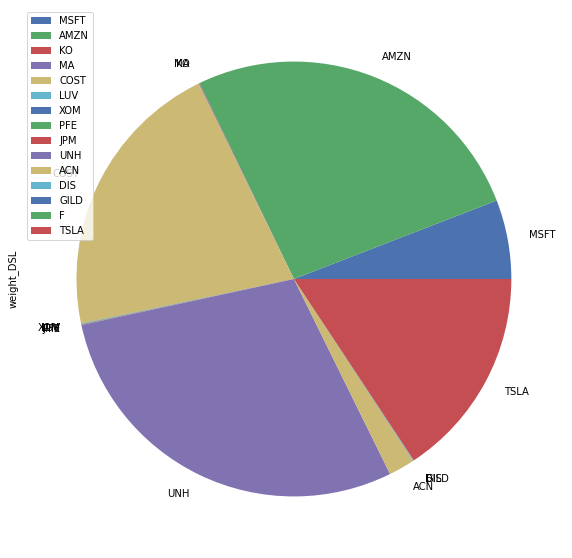

In [176]:
wei_.plot.pie(figsize=(10, 10),subplots=True)

In [177]:
weights

OrderedDict([('MSFT', 0.07703),
             ('AMZN', 0.0634),
             ('KO', 0.0451),
             ('MA', 0.08034),
             ('COST', 0.04751),
             ('LUV', 0.07316),
             ('XOM', 0.06782),
             ('PFE', 0.05383),
             ('JPM', 0.07832),
             ('UNH', 0.06865),
             ('ACN', 0.06901),
             ('DIS', 0.06607),
             ('GILD', 0.05877),
             ('F', 0.07291),
             ('TSLA', 0.07809)])

In [178]:
d={'Coef_MKV':list(opt_results.x),
   'Coef_DLS':list(coef),
   'Coef_pyport':list(weights.values())}

In [179]:
d_ = pd.DataFrame(data=d,index=assets.columns)

In [180]:
d_

,Coef_MKV,Coef_DLS,Coef_pyport
Symbols,,,
MSFT,1.287163e-16,0.058792,0.07703
AMZN,3.333397e-01,0.262750,0.06340
KO,0.000000e+00,0.000381,0.04510
MA,0.000000e+00,0.000489,0.08034
COST,3.058416e-01,0.210412,0.04751
LUV,1.774548e-16,0.000200,0.07316
XOM,8.136503e-16,0.000217,0.06782
PFE,0.000000e+00,0.000435,0.05383
JPM,0.000000e+00,0.000292,0.07832


## Backtesting

for the backtesting, we decide to invest 1000$ in our portfolio

In [181]:
#Allocation 
allo1,allo2,allo3=list(opt_results.x),list(coef),list(weights.values())

In [182]:
df=assets.copy()

In [183]:
# Data for return 
df_r=df/df.iloc[0]

In [184]:
allocation1,allocation2,allocation3=df_r*allo1,df_r*allo2,df_r*allo3

In [185]:
#We decide to invest 1000 $ in our ptf
Position1,Position2,Position3=allocation1*1000,allocation2*1000,allocation3*1000

In [186]:
#Total position 
Position_tot1,Position_tot2,Position_tot3=Position1.sum(axis=1),Position2.sum(axis=1),Position3.sum(axis=1)

In [190]:
Position=pd.DataFrame({"MKV":Position_tot1,"DLS":Position_tot2,"19%ofRisk":Position_tot3})

In [191]:
Position

,MKV,DLS,19%ofRisk
Date,,,
2015-01-02,1000.000000,1000.000043,1000.010000
2015-01-05,981.101564,979.948812,980.593888
2015-01-06,977.181340,976.098327,974.277001
2015-01-07,989.362271,986.254498,986.203790
2015-01-08,1003.227269,1005.330399,1005.196453
...,...,...,...
2021-12-27,8675.191150,9601.203170,5135.368539
2021-12-28,8691.924115,9608.591125,5131.876434
2021-12-29,8666.253581,9588.689709,5124.224649


In [192]:
fig = px.line(Position, template='plotly_white')
fig.show()